<a href="https://colab.research.google.com/github/RonakMehta21/Machine-Learning/blob/master/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [70]:
# Google drive link where the dataset is stored.
link = 'https://drive.google.com/open?id=1PuzBrkOrlKTgaVcl_1nHvmRIDpf3hOij'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1PuzBrkOrlKTgaVcl_1nHvmRIDpf3hOij


In [0]:
# Download the twitter dataset.
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data.txt')

In [0]:
import pandas as pd
import numpy as np

In [0]:
import pandas as pd
df = pd.read_fwf('data.txt')
df.to_csv('data.csv')

In [0]:
data = pd.read_csv('data.csv',header=None)

In [0]:
data['text'] = data[1]

In [0]:
# Load the regular expression library
import re

In [78]:
# Remove punctuation
data['text'] = data['text'].map(lambda x: re.sub('[,\.!?]', '', x))

<input>:1: DeprecationWarning: invalid escape sequence \.
<input>:1: DeprecationWarning: invalid escape sequence \.
<input>:1: DeprecationWarning: invalid escape sequence \.
<ipython-input-78-2990a2999eec>:1: DeprecationWarning: invalid escape sequence \.
  data['text'] = data['text'].map(lambda x: re.sub('[,\.!?]', '', x))


In [79]:
data['text']

0          What’s The Stock Market Seeing That We’re Not
1      As Americans brace for a week of horror the st...
2                  We don’t think it’s that complicated:
3                       There’s a lot of money out there
4      The government is pumping trillions of dollars...
                             ...                        
170    Help me it pleads get me to the screen where I...
171    Then there are the other voices: Heed the sign...
172    And still I carry on for some unknown reason P...
173    For these are the tools of my trade I’m a prod...
174             This post originally appeared on Journal
Name: text, Length: 175, dtype: object

In [81]:
data['text'][1]

'As Americans brace for a week of horror the stock market is having a very good run so far Why'

In [0]:
# Convert the titles to lowercase
data['text'] = data['text'].map(lambda x: x.lower())

In [83]:
# Print out the first rows of papers
data['text'].head()

0        what’s the stock market seeing that we’re not
1    as americans brace for a week of horror the st...
2                we don’t think it’s that complicated:
3                     there’s a lot of money out there
4    the government is pumping trillions of dollars...
Name: text, dtype: object

In [0]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

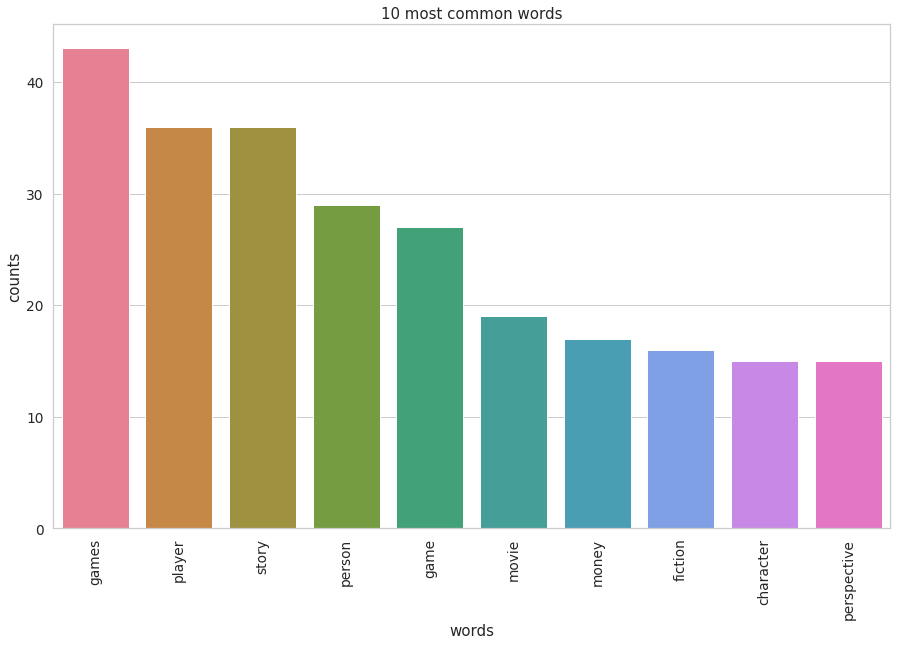

In [86]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data['text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [91]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
l = []
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        l.append(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
games money person fiction like going zero crime perspective game

Topic #1:
story player game money action way lot games reader mechanical

Topic #2:
games person game comedy book story gaming genres storytelling player

Topic #3:
story player want don little read narrative director forms exciting

Topic #4:
games time getting script end investors form way close say

Topic #5:
story player character person games game perspective players entirely storytelling

Topic #6:
movie games genre thematic person does good able star mechanical

Topic #7:
people genre mechanical script critical movie narrative point actor audience

Topic #8:
movies movie million people years banks making does institutions financial

Topic #9:
trump just look want really player big market sure writer


In [93]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [95]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [0]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

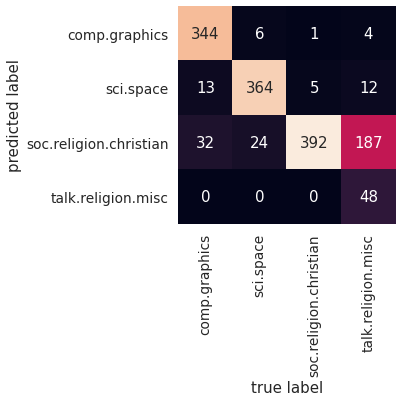

In [98]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [100]:
predict_category('sending a payload to the ISS')

'sci.space'

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [109]:
# Google drive link where the dataset is stored.
link = 'https://drive.google.com/open?id=14WPNDWDkw_Ry8GPdVuyirtb9Is70l2uh'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

14WPNDWDkw_Ry8GPdVuyirtb9Is70l2uh


In [0]:
# Download the twitter dataset.
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('MNBdatatset.csv')

In [0]:
df = pd.read_csv('MNBdatatset.csv')

In [112]:
df

,Label,Word1,Word2,Word3,Word4,Word5,Word6,Word7,Word8,Word9,Word10
0,fiction script,person,perspective,story,player,fiction,games,character,intent,change,script
1,crime story,player,games,story,crime,storytelling,fiction,like,actor,think,mechanical
2,game,games,player,person,end,getting,character,mechanics,investors,game,reader
3,comedy movie,games,player,comedy,don,action,movies,audience,years,good,movie
4,Finance,money,story,going,life,want,banks,new,zero,free,places
5,Mortgage game,games,genre,person,game,able,mortgage,character,does,just,going
6,Big movie,movie,read,book,reason,money,producer,big,people,wasn,just
7,romance movie,person,games,game,genres,narrative,movies,storytelling,11,romance,shooter
8,Player,movie,player,like,little,point,look,esther,dear,especially,story
9,third person game,game,games,player,fiction,players,literary,based,talk,really,gaming
